# Periodic Task Scheduling: Deadline Monotonic (DM) Algorithm

## Introduction

**Deadline Monotonic (DM)** is an extension of Rate Monotonic scheduling, where tasks can have relative deadlines less than or equal to their period.

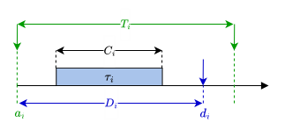

According to the DM algorithm, each task is assigned a **fixed priority inversely proportional to its relative deadline**. Thus, at any instant, the task with the shortest relative deadline is executed. Since relative deadlines are constant, DM is a static priority assignment.

### Key Properties
- **Optimal**: A set of tasks is schedulable with fixed priority algorithm A ⟹ is schedulable with DM
- **Static Priority**: Priorities are assigned once based on deadlines and never change
- **Preemptive**: Higher priority tasks can interrupt lower priority tasks

---

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Image
import rate_monotonic as rtm
import task_schedule_visualizer as tsv
import matplotlib.pyplot as plt

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## Sufficient Criteria for Schedulability 1
*Simple but a little pessimistic*

$$\sum_{i=1}^n{\frac{C_i}{D_i}} \leq n(2^{\frac{1}{n}}-1)$$

### Example 1: Task Set with Mixed Deadlines

📋 Task Set 1 Parameters (Easy Case - D < T):


,Period (T),Deadline (D),Execution Time (C),D/T Ratio
0,8,6,2,0.750000
1,12,10,3,0.833333
2,20,18,4,0.900000


💹 Total Utilization (∑C/T): 0.700
🎯 Deadline Utilization (∑C/D): 0.856
📊 RM Bound (n=3): 0.780
🔄 DM Analysis: Uses D for priority assignment (shorter D = higher priority)

📋 Task Set 2 Parameters (Medium Case - D < T):


,Period (T),Deadline (D),Execution Time (C),D/T Ratio
0,6,4,1,0.666667
1,10,8,3,0.800000
2,15,12,4,0.800000


💹 Total Utilization (∑C/T): 0.733
🎯 Deadline Utilization (∑C/D): 0.958
📊 RM Bound (n=3): 0.780
🔄 DM Analysis: Uses D for priority assignment (shorter D = higher priority)

📋 Task Set 3 Parameters (Hard Case - D < T):


,Period (T),Deadline (D),Execution Time (C),D/T Ratio
0,7,5,2,0.714286
1,14,10,4,0.714286
2,21,15,6,0.714286


💹 Total Utilization (∑C/T): 0.857
🎯 Deadline Utilization (∑C/D): 1.200
📊 RM Bound (n=3): 0.780
🔄 DM Analysis: Uses D for priority assignment (shorter D = higher priority)

📈 Task Set 1 - Deadline Monotonic Schedule:


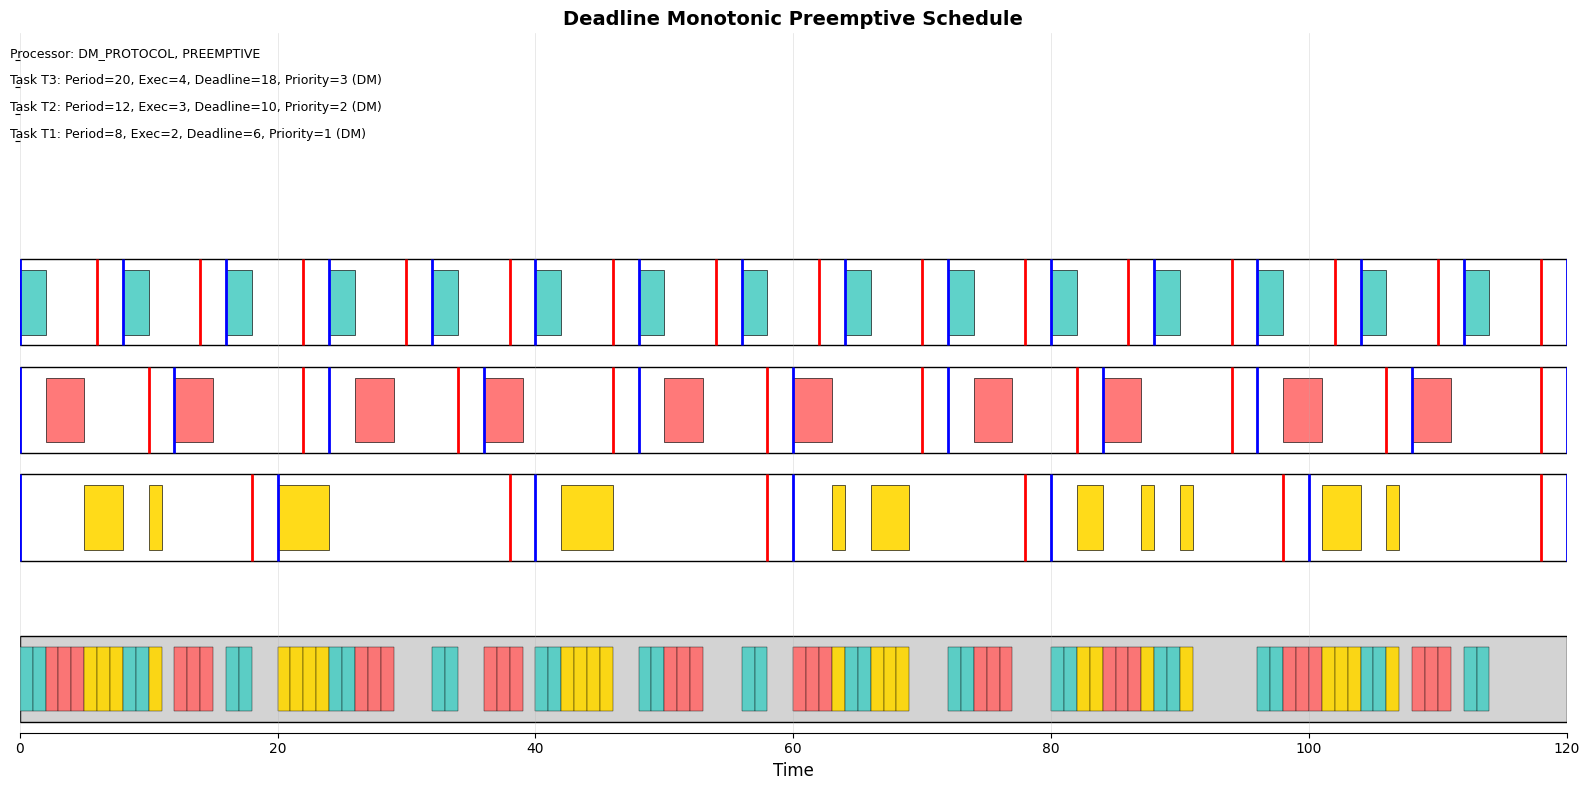

In [15]:
# Define Task Sets with Progressive Difficulty (D ≠ T)
# Task Set 1: Easy case - schedulable with all methods
task_set_1 = [
    rtm.Task(period=8,  deadline=6,  execution_time=2),   # D < T, Utilization: 0.25
    rtm.Task(period=12, deadline=10, execution_time=3),   # D < T, Utilization: 0.25
    rtm.Task(period=20, deadline=18, execution_time=4)    # D < T, Utilization: 0.20
]
# Total utilization: 0.70 (moderate utilization, tight deadlines)

# Task Set 2: Medium case - fails sufficient condition 1, passes 2 and 3
task_set_2 = [
    rtm.Task(period=6,  deadline=4,  execution_time=1),   # D < T, High priority
    rtm.Task(period=10, deadline=8,  execution_time=3),   # D < T, Medium priority
    rtm.Task(period=15, deadline=12, execution_time=4)    # D < T, Low priority
]
# Total utilization: 0.73 (reasonable utilization but tight deadlines)

# Task Set 3: Hard case - only schedulable with exact response time analysis
task_set_3 = [
    rtm.Task(period=7,  deadline=5,  execution_time=2),   # D < T, Very tight deadline
    rtm.Task(period=14, deadline=10, execution_time=4),   # D < T, Tight deadline
    rtm.Task(period=21, deadline=15, execution_time=6)    # D < T, Tight deadline
]
# Total utilization: 0.90 (high utilization with constrained deadlines)

# Initialize schedulable matrix to store results
# schedulable[task_set][method] = result
schedulable = [[None, None, None], [None, None, None], [None, None, None]]

# Display task parameters in a table
def display_task_set(task_set, title="Task Set Parameters"):
    task_matrix = [[task.period, task.deadline, task.execution_time, task.deadline/task.period] for task in task_set]
    df = pd.DataFrame(task_matrix, columns=['Period (T)', 'Deadline (D)', 'Execution Time (C)', 'D/T Ratio'])
    
    # Calculate total utilization (C/T) and deadline utilization (C/D)
    total_util = sum(task.execution_time / task.period for task in task_set)
    deadline_util = sum(task.execution_time / task.deadline for task in task_set)
    
    print(f"📋 {title}:")
    display(df)
    print(f"💹 Total Utilization (∑C/T): {total_util:.3f}")
    print(f"🎯 Deadline Utilization (∑C/D): {deadline_util:.3f}")
    print(f"📊 RM Bound (n=3): {3 * (2**(1/3) - 1):.3f}")
    print(f"🔄 DM Analysis: Uses D for priority assignment (shorter D = higher priority)")
    print()

display_task_set(task_set_1, "Task Set 1 Parameters (Easy Case - D < T)")
display_task_set(task_set_2, "Task Set 2 Parameters (Medium Case - D < T)")
display_task_set(task_set_3, "Task Set 3 Parameters (Hard Case - D < T)")

# Generate and display Task Set 1 schedule plot using Deadline Monotonic
print("📈 Task Set 1 - Deadline Monotonic Schedule:")
tsv.plot_rm_schedule_inline(task_set_1, lcm_cycles=1, algorithm='DM');

🔍 Schedulability Analysis (Sufficient Condition 1):
Rate Monotonic Schedulability Analysis


,Task,Execution Time (C),Period (T),Deadline (D),Utilization (C/T)
0,T1,2,8,6,0.333
1,T2,3,12,10,0.300
2,T3,4,20,18,0.222



Summary:


,Metric,Value
0,Number of Tasks,3
1,Total Utilization,0.856
2,RM Bound,0.780
3,Schedulable,✗ No



❌ The task set 1 may not be schedulable (but further analysis needed).



--------------------------------------------------
Rate Monotonic Schedulability Analysis


,Task,Execution Time (C),Period (T),Deadline (D),Utilization (C/T)
0,T1,1,6,4,0.250
1,T2,3,10,8,0.375
2,T3,4,15,12,0.333



Summary:


,Metric,Value
0,Number of Tasks,3
1,Total Utilization,0.958
2,RM Bound,0.780
3,Schedulable,✗ No



❌ The task set 2 may not be schedulable (but further analysis needed).



--------------------------------------------------
Rate Monotonic Schedulability Analysis


,Task,Execution Time (C),Period (T),Deadline (D),Utilization (C/T)
0,T1,2,7,5,0.400
1,T2,4,14,10,0.400
2,T3,6,21,15,0.400



Summary:


,Metric,Value
0,Number of Tasks,3
1,Total Utilization,1.200
2,RM Bound,0.780
3,Schedulable,✗ No



❌ The task set 3 may not be schedulable (but further analysis needed).



--------------------------------------------------

📈 Task Set 2 - Deadline Monotonic Schedule:


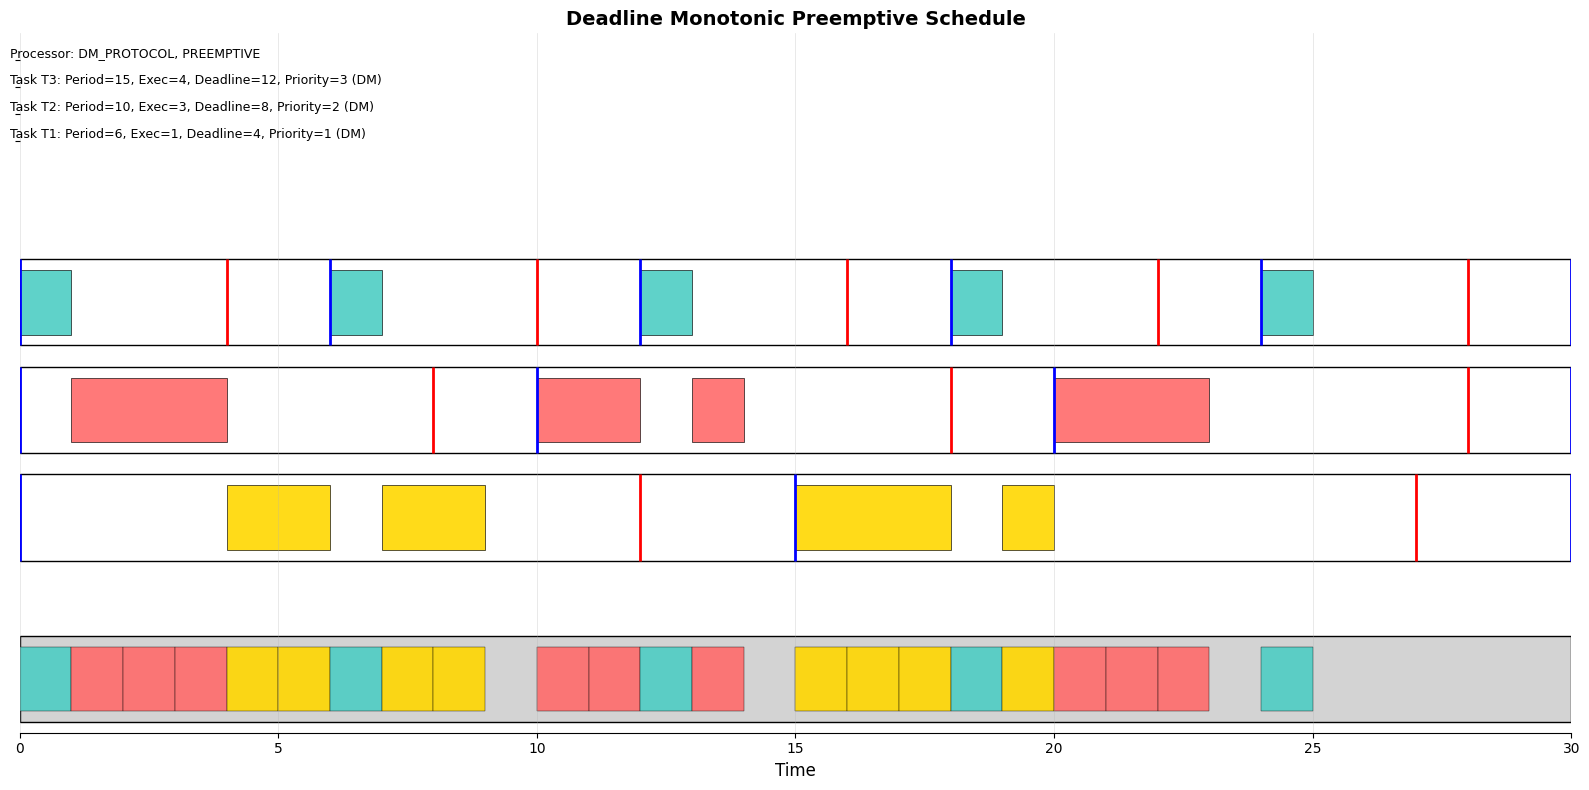

In [16]:
# Check schedulability using sufficient condition 1
print("🔍 Schedulability Analysis (Sufficient Condition 1):")
print("=" * 50)

def check_schedulability(task_set, set_name):
    schedulable = rtm.rate_monotonic_check(task_set, verbose=True)
    if schedulable:
        print(f"\n✅ The {set_name} is schedulable under Deadline Monotonic scheduling.")
    else:
        print(f"\n❌ The {set_name} may not be schedulable (but further analysis needed).")
    print("\n\n")
    print("-" * 50)
    return schedulable

schedulable[0][0] = check_schedulability(task_set_1, "task set 1")
schedulable[1][0] = check_schedulability(task_set_2, "task set 2")
schedulable[2][0] = check_schedulability(task_set_3, "task set 3")

# Generate and display Task Set 2 schedule plot using Deadline Monotonic
print("\n📈 Task Set 2 - Deadline Monotonic Schedule:")
tsv.plot_rm_schedule_inline(task_set_2, lcm_cycles=1, algorithm='DM');

---

## Sufficient Criteria for Schedulability 2
*A little less pessimistic*

The response time for task $i$ is calculated as:

$$R_i = C_i + I_i = C_i + \sum_{h=1}^{i-1}{\left\lceil{\frac{D_i}{T_h}}\right\rceil C_h} \leq D_i$$

Where:
- $R_i$ = Response time of task $i$
- $C_i$ = Execution time of task $i$  
- $I_i$ = Interference from higher priority tasks
- $D_i$ = Deadline of task $i$
- $T_h$ = Period of higher priority task $h$

In [17]:
# Check schedulability using sufficient condition 2
print("🔍 Schedulability Analysis (Sufficient Condition 2):")
print("=" * 50)

def check_schedulability_v2(task_set, set_name):
    schedulable_result = rtm.rate_monotonic_check_1(task_set, verbose=True)
    if schedulable_result:
        print(f"\n✅ The {set_name} is schedulable under Deadline Monotonic scheduling.")
    else:
        print(f"\n❌ The {set_name} may not be schedulable (but further analysis needed).")
    print("\n" + "-" * 50)
    return schedulable_result

schedulable[0][1] = check_schedulability_v2(task_set_1, "task set 1")
schedulable[1][1] = check_schedulability_v2(task_set_2, "task set 2")
schedulable[2][1] = check_schedulability_v2(task_set_3, "task set 3")

🔍 Schedulability Analysis (Sufficient Condition 2):

DEADLINE-BASED RESPONSE TIME ANALYSIS


,Task,Period (T),Execution (C),Deadline (D),Utilization,Interference (I),Response Time (R),R ≤ D
0,T1,8,2,6,0.250,0.0,2.0,✓
1,T2,12,3,10,0.250,4.0,7.0,✓
2,T3,20,4,18,0.200,12.0,16.0,✓



Interference Calculation Details:
------------------------------------------------------------
Task T2: I = ⌈10/8⌉×2=4.0
Task T3: I = ⌈18/8⌉×2=6.0 + ⌈18/12⌉×3=6.0

SUMMARY:
Total Utilization: 0.700
Schedulable Tasks: 3/3
Overall Status: SCHEDULABLE

✅ The task set 1 is schedulable under Deadline Monotonic scheduling.

--------------------------------------------------

DEADLINE-BASED RESPONSE TIME ANALYSIS


,Task,Period (T),Execution (C),Deadline (D),Utilization,Interference (I),Response Time (R),R ≤ D
0,T1,6,1,4,0.167,0.0,1.0,✓
1,T2,10,3,8,0.300,2.0,5.0,✓
2,T3,15,4,12,0.267,8.0,12.0,✓



Interference Calculation Details:
------------------------------------------------------------
Task T2: I = ⌈8/6⌉×1=2.0
Task T3: I = ⌈12/6⌉×1=2.0 + ⌈12/10⌉×3=6.0

SUMMARY:
Total Utilization: 0.733
Schedulable Tasks: 3/3
Overall Status: SCHEDULABLE

✅ The task set 2 is schedulable under Deadline Monotonic scheduling.

--------------------------------------------------

DEADLINE-BASED RESPONSE TIME ANALYSIS


,Task,Period (T),Execution (C),Deadline (D),Utilization,Interference (I),Response Time (R),R ≤ D
0,T1,7,2,5,0.286,0.0,2.0,✓
1,T2,14,4,10,0.286,4.0,8.0,✓
2,T3,21,6,15,0.286,14.0,20.0,✗



Interference Calculation Details:
------------------------------------------------------------
Task T2: I = ⌈10/7⌉×2=4.0
Task T3: I = ⌈15/7⌉×2=6.0 + ⌈15/14⌉×4=8.0

SUMMARY:
Total Utilization: 0.857
Schedulable Tasks: 2/3
Overall Status: NOT SCHEDULABLE

❌ The task set 3 may not be schedulable (but further analysis needed).

--------------------------------------------------


---

## Necessary and Sufficient: Response Time Analysis
*Exact schedulability test*

The **exact response time analysis** uses an iterative approach:

$$R_i^{(k+1)} = C_i + \sum_{h=1}^{i-1}{\left\lceil{\frac{R_i^{(k)}}{T_h}}\right\rceil C_h}$$

The iteration continues until $R_i^{(k+1)} = R_i^{(k)}$ (convergence) or $R_i^{(k)} > D_i$ (deadline miss).

**Schedulability condition**: $R_i \leq D_i$ for all tasks $i$

🔍 Response Time Analysis (Necessary & Sufficient Test):

📝 Task Set 1:

RESPONSE TIME ANALYSIS RESULTS
Task  Period (T)  Execution (C)  Deadline (D) Utilization Response Time (R) R ≤ D      Status
  T1           8              2             6       0.333               2.0     ✓ Schedulable
  T2          12              3            10       0.300               5.0     ✓ Schedulable
  T3          20              4            18       0.222              11.0     ✓ Schedulable

SUMMARY:
Total Utilization: 0.700
Schedulable Tasks: 3/3
Overall Status: SCHEDULABLE

📝 Task Set 2:

RESPONSE TIME ANALYSIS RESULTS
Task  Period (T)  Execution (C)  Deadline (D) Utilization Response Time (R) R ≤ D      Status
  T1           6              1             4       0.250               1.0     ✓ Schedulable
  T2          10              3             8       0.375               4.0     ✓ Schedulable
  T3          15              4            12       0.333               9.0     ✓ Schedulable

SUMMARY:
To

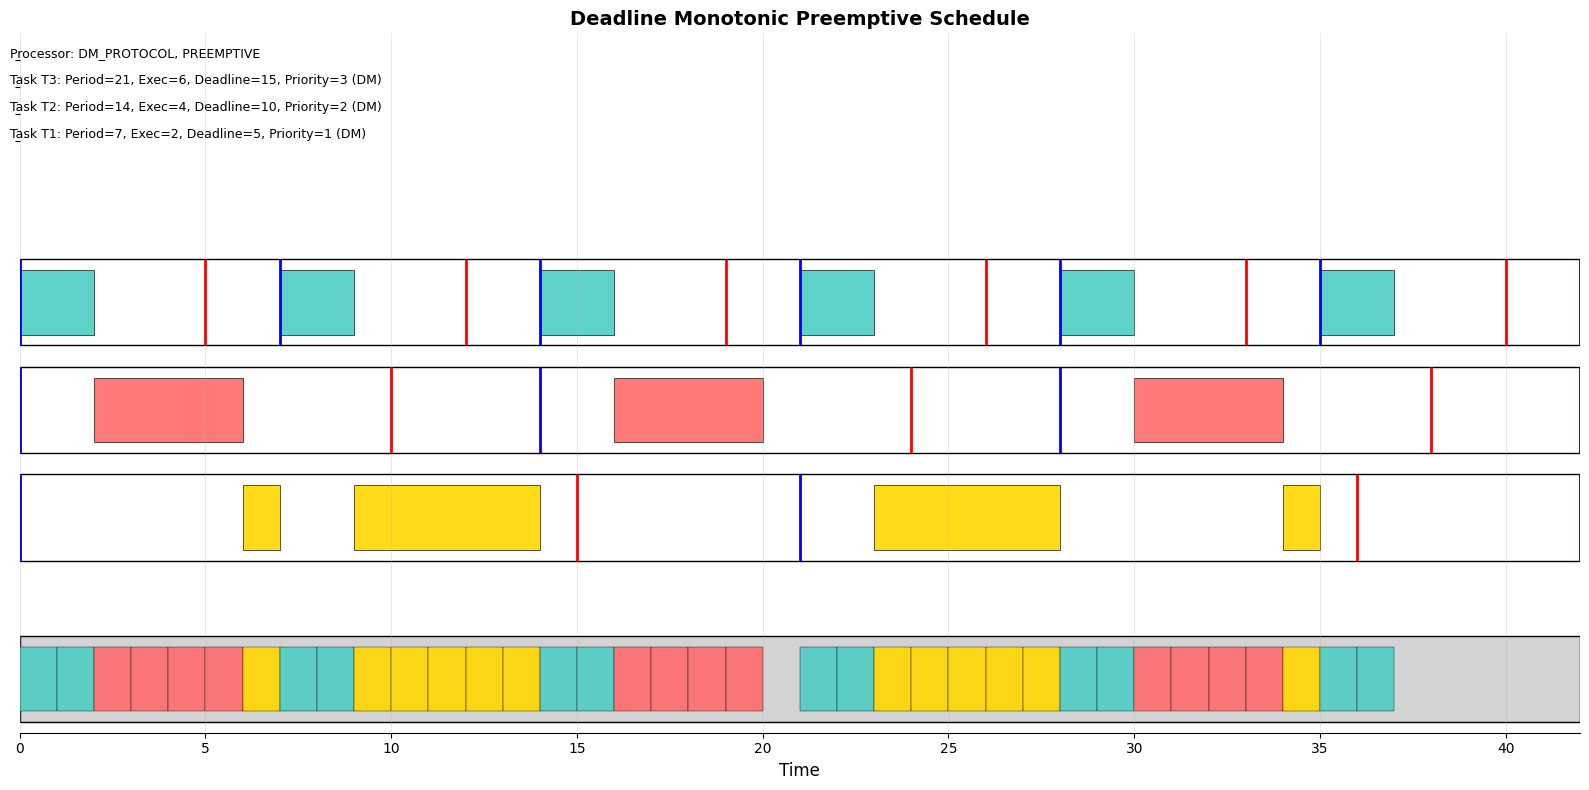

In [18]:
# Response Time Analysis
print("🔍 Response Time Analysis (Necessary & Sufficient Test):")
print("=" * 55)

def run_response_time_analysis(task_set, set_name):
    # Sort tasks by deadline (Deadline Monotonic priority order)
    sorted_tasks = sorted(task_set, key=lambda x: x.deadline)
    # Perform response time analysis
    schedulable_rt, response_times = rtm.response_time_analysis(task_set)
    # Display results in a formatted table
    print(f"\n📝 {set_name}:")
    rtm.display_response_time_table(task_set, response_times, schedulable_rt)
    return schedulable_rt

schedulable[0][2] = run_response_time_analysis(task_set_1, "Task Set 1")
schedulable[1][2] = run_response_time_analysis(task_set_2, "Task Set 2")
schedulable[2][2] = run_response_time_analysis(task_set_3, "Task Set 3")

# Generate and display Task Set 3 schedule plot using Deadline Monotonic
print("\n📈 Task Set 3 - Deadline Monotonic Schedule:")
tsv.plot_rm_schedule_inline(task_set_3, lcm_cycles=1, algorithm='DM');

In [19]:
# Generate Summary Table from Results
print("📊 **Test Results Summary**")
print("=" * 50)

# Method names
methods = ["Sufficient Condition 1", "Sufficient Condition 2", "Response Time Analysis"]
task_sets = ["Task Set 1", "Task Set 2", "Task Set 3"]

# Create summary table
summary_data = []
for i, method in enumerate(methods):
    row = [method]
    for j in range(3):  # 3 task sets
        if schedulable[j][i] is not None:
            result = schedulable[j][i]
            if result:
                row.append("✅ Schedulable")
            else:
                row.append("❌ Not Schedulable")
        else:
            row.append("-")
    summary_data.append(row)

# Create DataFrame for better display
summary_df = pd.DataFrame(summary_data, columns=["Method"] + task_sets)
display(summary_df)


📊 **Test Results Summary**


,Method,Task Set 1,Task Set 2,Task Set 3
0,Sufficient Condition 1,❌ Not Schedulable,❌ Not Schedulable,❌ Not Schedulable
1,Sufficient Condition 2,✅ Schedulable,✅ Schedulable,❌ Not Schedulable
2,Response Time Analysis,✅ Schedulable,✅ Schedulable,✅ Schedulable


---

## Summary and Conclusions

This notebook demonstrated three different approaches to analyze **Deadline Monotonic scheduling**:

### 🔑 **Key Takeaways**

1. **Sufficient conditions** are pessimistic but computationally efficient
   - They may fail to identify schedulable task sets (false negatives)
   - Useful for quick initial screening

2. **Response time analysis** provides the exact schedulability test
   - Most accurate but computationally intensive
   - Necessary and sufficient condition

3. **Deadline Monotonic** is optimal among fixed-priority algorithms
   - Tasks with **shorter deadlines** get **higher priority**
   - Can handle cases where D ≤ T (unlike Rate Monotonic)

### 🎯 **When to Use Each Method**

- **Sufficient Condition 1**: Quick initial check (fastest, most pessimistic)
- **Sufficient Condition 2**: When condition 1 fails but you want a fast test
- **Response Time Analysis**: When you need the definitive answer (exact test)

### 💡 **Practical Insights**

- The progression from sufficient conditions to exact analysis shows increasing accuracy
- Higher utilization doesn't always mean unschedulable
- Deadline constraints matter more than periods in DM scheduling
- Always use response time analysis for final validation

---

*📚 This completes our analysis of Deadline Monotonic scheduling algorithms.*